# Introduction

As you learned in lecture, time series data has three components: 
1. Trend
2. Seasonality
3. Residual 

Now comes time for the rubber meet the road, so to speak. Let's take what we've learned about time series data and apply it.
![](https://miro.medium.com/max/1568/1*ZWaHZuUfv39fW5lJEzqIdw.jpeg)
# Learning Outcomes

What will we accomplish?
1. First, we'll separately construct each time series component. 
2. Then we'll bring the three components together to create a simulated time series dataset. 
3. Finally, we'll leverage time series model decomposition in Python to deconstruct the series. 

We'll complete this process for the two most common processes: additive and multiplicative.

The whole point of this exercise is to get you familiar with time series data and simple modeling approaches. 

You should walk away from this tutorial with:
1. A practical understanding of the three components of time series data 
2. A better understanding of additive and multiplicative models
3. A simple way to decompose time series data in Python

# Imports

In [3]:
!pip install statsmodels

In [4]:
%matplotlib inline

import sys
import statsmodels as ss
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Python & Library Versions

In [5]:
versions = ( ("matplotlib", matplotlib.__version__),
            ("numpy", np.__version__),
            ("statsmodels", ss.__version__) )

print(sys.version, "\n")
print("library" + " " * 4 + "version")
print("-" * 18)

for tup1, tup2 in versions:
    print("{:11} {}".format(tup1, tup2))

3.6.8 (tags/v3.6.8:3c6b436a57, Dec 24 2018, 00:16:47) [MSC v.1916 64 bit (AMD64)] 

library    version
------------------
matplotlib  3.1.2
numpy       1.18.1
statsmodels 0.11.0


In [6]:
ss.__version__

'0.11.0'

In [7]:
np.__version__

'1.18.1'

In [8]:
matplotlib.__version__

'3.1.2'

---
# Section 1: Construct Trend, Seasonality, and Residual Components

In this lesson, we will individually construct fictional trend, seasonality, and residual components. This is merely an example to show you how a simple time series dataset is constructed. This will aid your understanding later on. In the meantime, let's create a time interval of minutes. 

In [9]:
time = np.arange(1, 51)
time

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

Now we need to create a trend. Let's pretend we have a sensor measuring demand for electricity. We'll ignore units to keep things simple.

In [10]:
trend = time * 2.75
trend

array([  2.75,   5.5 ,   8.25,  11.  ,  13.75,  16.5 ,  19.25,  22.  ,
        24.75,  27.5 ,  30.25,  33.  ,  35.75,  38.5 ,  41.25,  44.  ,
        46.75,  49.5 ,  52.25,  55.  ,  57.75,  60.5 ,  63.25,  66.  ,
        68.75,  71.5 ,  74.25,  77.  ,  79.75,  82.5 ,  85.25,  88.  ,
        90.75,  93.5 ,  96.25,  99.  , 101.75, 104.5 , 107.25, 110.  ,
       112.75, 115.5 , 118.25, 121.  , 123.75, 126.5 , 129.25, 132.  ,
       134.75, 137.5 ])

What folllows is a plot showing trend as a function of time.

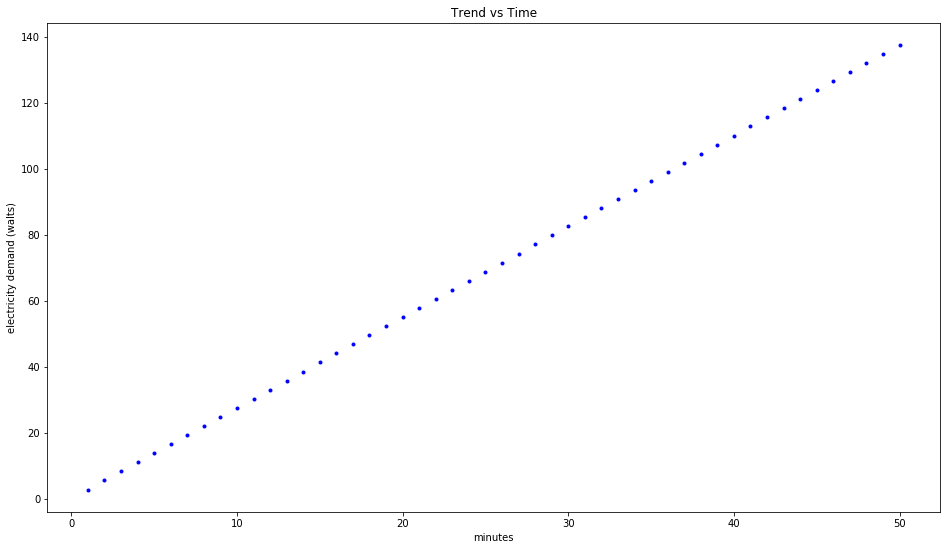

In [12]:
plt.figure(figsize=(16,9))
plt.plot(time, trend, 'b.')
plt.title("Trend vs Time")
plt.xlabel("minutes")
plt.ylabel("electricity demand (walts)");

Great! Now let's generate a seasonal component.

In [14]:
seasonal = 10 + np.sin(time) * 10
seasonal

array([1.84147098e+01, 1.90929743e+01, 1.14112001e+01, 2.43197505e+00,
       4.10757253e-01, 7.20584502e+00, 1.65698660e+01, 1.98935825e+01,
       1.41211849e+01, 4.55978889e+00, 9.79344930e-05, 4.63427082e+00,
       1.42016704e+01, 1.99060736e+01, 1.65028784e+01, 7.12096683e+00,
       3.86025081e-01, 2.49012753e+00, 1.14987721e+01, 1.91294525e+01,
       1.83665564e+01, 9.91148691e+00, 1.53779596e+00, 9.44216380e-01,
       8.67648250e+00, 1.76255845e+01, 1.95637593e+01, 1.27090579e+01,
       3.36366116e+00, 1.19683759e-01, 5.95962355e+00, 1.55142668e+01,
       1.99991186e+01, 1.52908269e+01, 5.71817331e+00, 8.22114656e-02,
       3.56461867e+00, 1.29636858e+01, 1.96379539e+01, 1.74511316e+01,
       8.41377331e+00, 8.34784521e-01, 1.68225257e+00, 1.01770193e+01,
       1.85090352e+01, 1.90178835e+01, 1.12357312e+01, 2.31745339e+00,
       4.62473472e-01, 7.37625146e+00])

Naturally, we'll want to plot our seasonality.

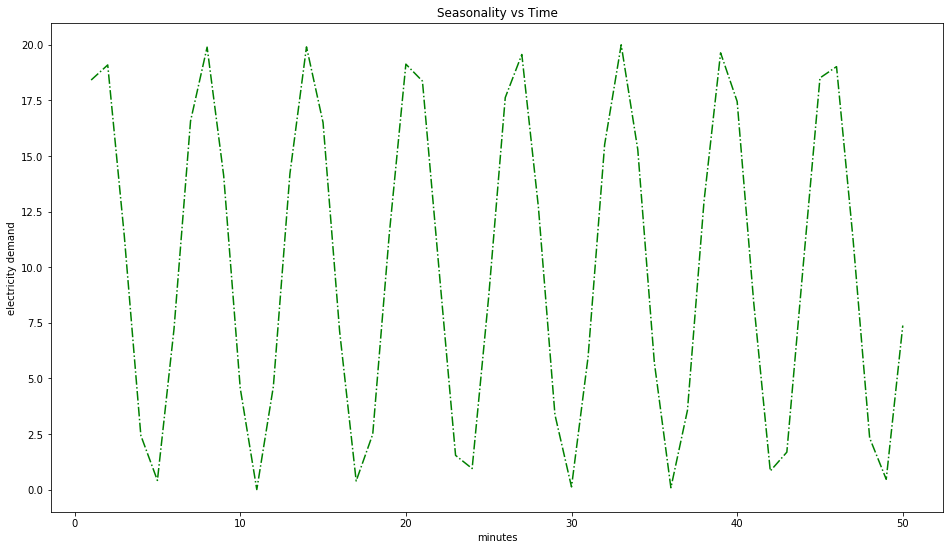

In [16]:
plt.figure(figsize=(16,9))
plt.plot(time, seasonal, 'g-.')
plt.title("Seasonality vs Time")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

And now to construct the residual component.

In [17]:
np.random.seed(10)  # reproducible results
residual = np.random.normal(loc=0.0, scale=1, size=len(time))
residual

array([ 1.3315865 ,  0.71527897, -1.54540029, -0.00838385,  0.62133597,
       -0.72008556,  0.26551159,  0.10854853,  0.00429143, -0.17460021,
        0.43302619,  1.20303737, -0.96506567,  1.02827408,  0.22863013,
        0.44513761, -1.13660221,  0.13513688,  1.484537  , -1.07980489,
       -1.97772828, -1.7433723 ,  0.26607016,  2.38496733,  1.12369125,
        1.67262221,  0.09914922,  1.39799638, -0.27124799,  0.61320418,
       -0.26731719, -0.54930901,  0.1327083 , -0.47614201,  1.30847308,
        0.19501328,  0.40020999, -0.33763234,  1.25647226, -0.7319695 ,
        0.66023155, -0.35087189, -0.93943336, -0.48933722, -0.80459114,
       -0.21269764, -0.33914025,  0.31216994,  0.56515267, -0.14742026])

A quick plot of residuals...

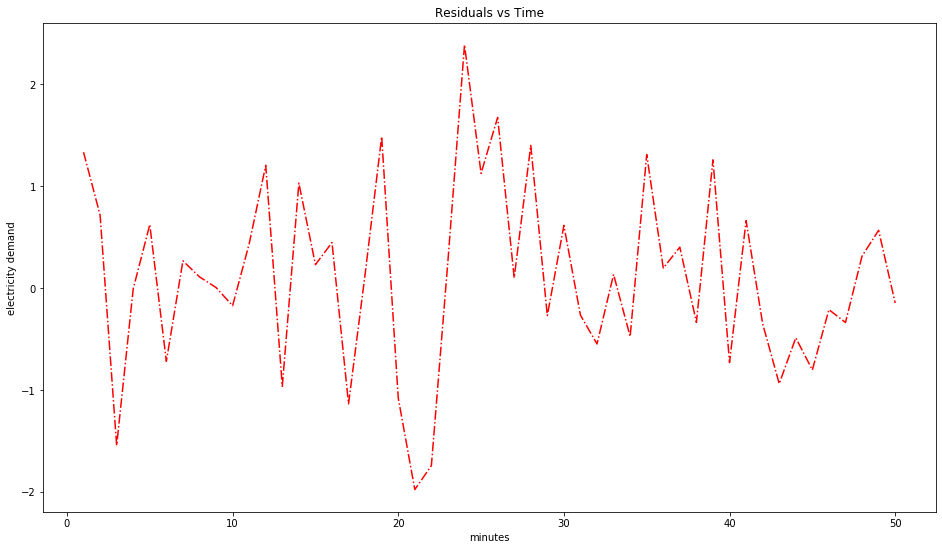

In [19]:
plt.figure(figsize=(16,9))
plt.plot(time, residual, 'r-.')
plt.title("Residuals vs Time")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

Quick recap: We created data for the fictional demand of electricity as measured by a fictional sensor. We did this by creating the three necessary components of time series data, which include trend, seasonality, and residuals. 

Next step: Aggregate the three components to create time series data. We'll do this for two different types of models: additive and multiplicative.

---
# Section 2: Aggregate Trend, Seasonality, and Residual Components

### Additive Time Series
Remember the equation for additive time series is simply: $O_{t} = T_{t} + S_{t} + R_{t}$ 

$O_{t}$ is the output   
$T_{t}$ is the trend  
$S_{t}$ is the seasonality  
$R_{t}$ is the residual  
$_t$ is a variable representing a particular point in time 

In [21]:
additive = trend + seasonal + residual
additive

array([ 22.49629635,  25.30825324,  18.11579979,  13.4235912 ,
        14.78209323,  22.98575946,  36.08537757,  42.00213099,
        38.87547628,  31.88518868,  30.68312412,  38.83730819,
        48.9866047 ,  59.43434763,  57.98150853,  51.56610445,
        45.99942287,  52.12526441,  65.2333091 ,  73.04964762,
        74.1388281 ,  68.66811461,  65.05386612,  69.32918371,
        78.55017375,  90.79820672,  93.9129085 ,  91.10705426,
        82.84241317,  83.23288794,  90.94230636, 102.9649578 ,
       110.8818269 , 108.31468485, 103.27664639,  99.27722474,
       105.71482865, 117.12605345, 128.14442613, 126.7191621 ,
       121.82400486, 115.98391263, 118.99281921, 130.68768203,
       141.4544441 , 145.30518584, 140.14659098, 134.62962332,
       135.77762614, 144.72883121])

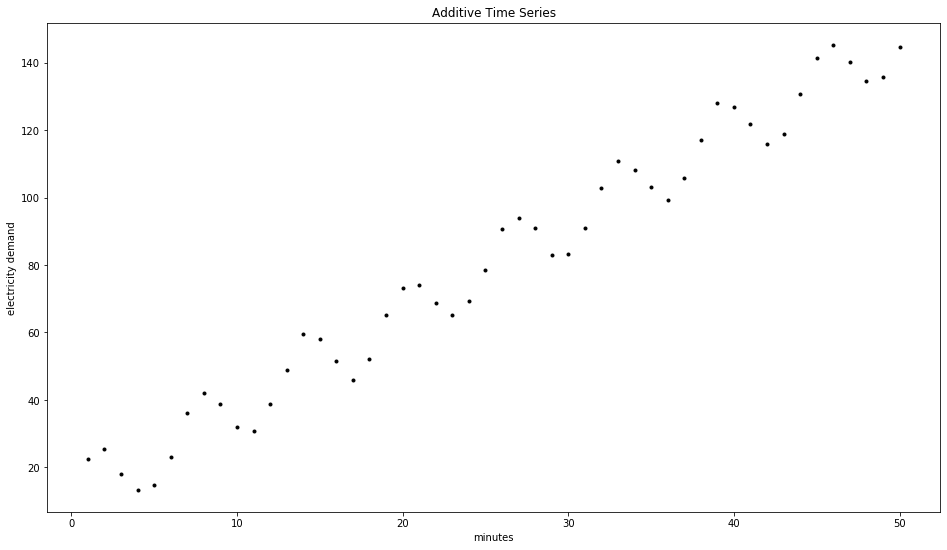

In [23]:
plt.figure(figsize=(16,9))
plt.plot(time, additive, 'k.')
plt.title("Additive Time Series")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

We clearly see trend and seasonality in the plot above, as expected.

Now let's build a multiplicative time series dataset. 

### Multiplicative Time Series

Remember the equation for multiplicative time series is simply: $O_{t} = T_{t} * S_{t} * R_{t}$ 

In [26]:
# ignoring residual to make pattern more apparent
ignored_residual = np.ones_like(residual)
multiplicative = trend * seasonal * ignored_residual
multiplicative

array([5.06404521e+01, 1.05011358e+02, 9.41424007e+01, 2.67517255e+01,
       5.64791223e+00, 1.18896443e+02, 3.18969920e+02, 4.37658814e+02,
       3.49499325e+02, 1.25394195e+02, 2.96251841e-03, 1.52930937e+02,
       5.07709716e+02, 7.66383832e+02, 6.80743734e+02, 3.13322541e+02,
       1.80466725e+01, 1.23261313e+02, 6.00810842e+02, 1.05211989e+03,
       1.06066863e+03, 5.99644958e+02, 9.72655944e+01, 6.23182811e+01,
       5.96508172e+02, 1.26022929e+03, 1.45260913e+03, 9.78597457e+02,
       2.68251977e+02, 9.87391012e+00, 5.08057907e+02, 1.36525548e+03,
       1.81492001e+03, 1.42969231e+03, 5.50374181e+02, 8.13893509e+00,
       3.62699949e+02, 1.35470516e+03, 2.10617055e+03, 1.91962448e+03,
       9.48652941e+02, 9.64176122e+01, 1.98926367e+02, 1.23141933e+03,
       2.29049311e+03, 2.40576226e+03, 1.45221826e+03, 3.05903847e+02,
       6.23183004e+01, 1.01423458e+03])

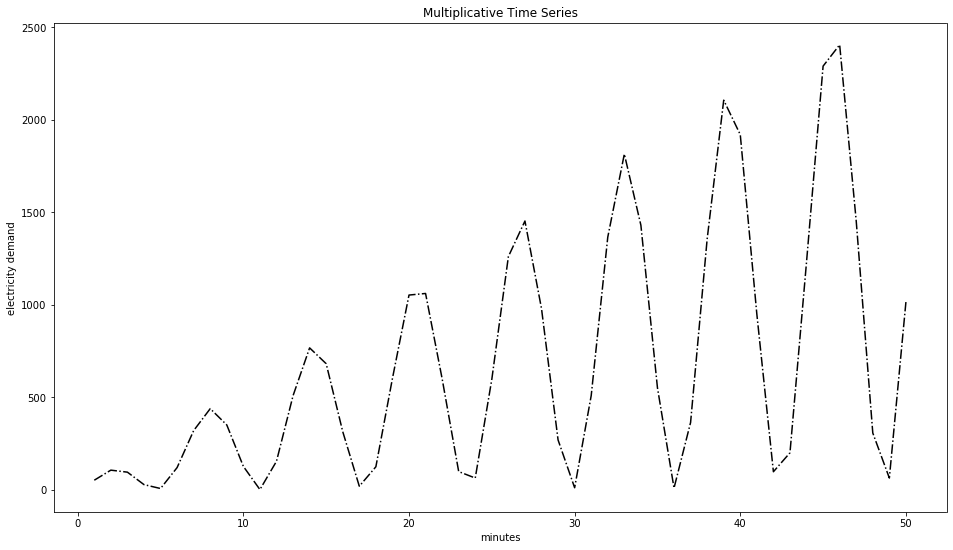

In [27]:
plt.figure(figsize=(16,9))
plt.plot(time, multiplicative, 'k-.')
plt.title("Multiplicative Time Series")
plt.xlabel("minutes") 
plt.ylabel("electricity demand");

### Exercise #1
In this exercise, your task is two-fold:
1. Determine if **Dataset_A** and **Dataset_B** are additive or multiplicative time series.
2. Determine the frequency of the seasonal component.

#### Set Path / Load Datasets

In [29]:
# get data
path_to_file = "../Data/"

time = np.arange(0, 50)
dataset_A = np.load(path_to_file + "dataset_A.npy")
dataset_B = np.load(path_to_file + "dataset_B.npy")

In [30]:
dataset_A

array([  0.28273891,   2.97953109,   6.5448212 ,  11.76725551,
        13.78145296,  13.87246427,  13.4155171 ,  11.88483252,
        10.99783136,  11.42658353,  14.5176831 ,  27.25401399,
        36.8331351 ,  34.98767786,  48.55980457,  51.44742424,
        45.89555474,  40.64013715,  35.49823377,  28.32943452,
        26.39972871,  33.54723363,  43.72690428,  62.42618092,
        76.39776699,  80.63234301,  90.20039124,  88.58326016,
        85.25394552,  72.77182631,  54.01093978,  44.36441898,
        46.90515402,  54.90980609,  74.79544424,  99.82282811,
       112.57379701, 130.9552162 , 120.47849237, 105.69927032,
        95.75449525,  72.56461573,  56.92593537,  57.34341535,
        66.34237576,  87.0368809 , 118.66979681, 136.90524576,
       166.12940715, 170.75108362])

#### Plot Dataset_A

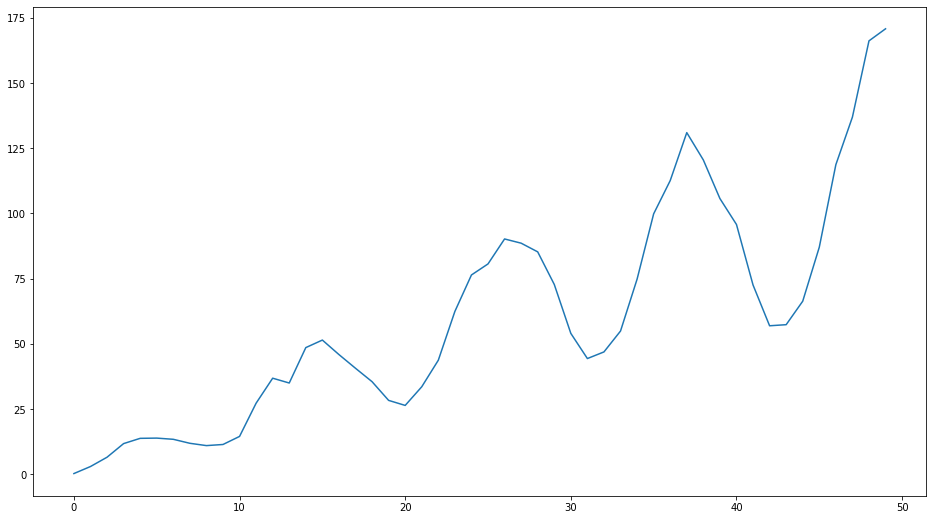

In [34]:
# insert code here
plt.figure(figsize=(16,9))
plt.plot(dataset_A) 

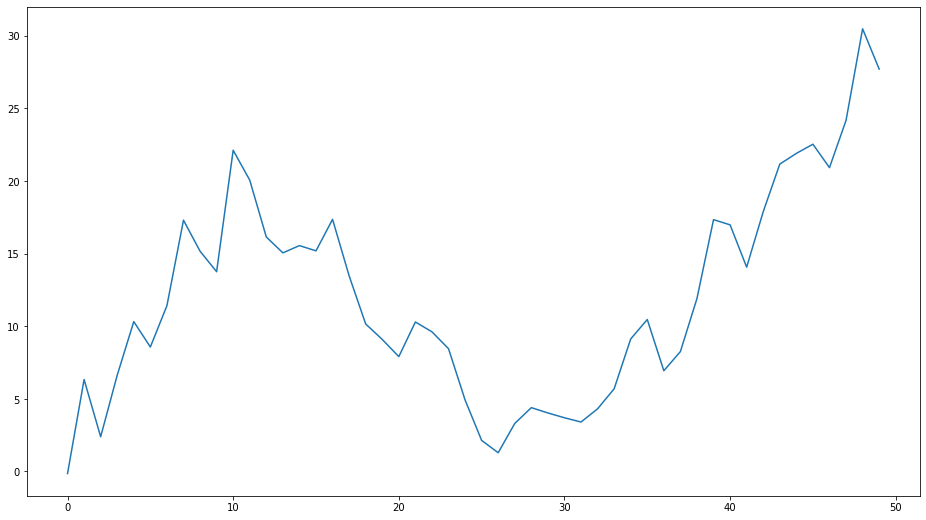

In [35]:
plt.figure(figsize=(16,9))
plt.plot(dataset_B)

#### Additive or Multiplicative?

*(Your answer goes here.)*

#### Frequency of Seasonal Component?

*(Your answer goes here.)*

#### Plot Dataset_B

In [ ]:
# insert code here


#### Additive or Multiplicative?

*(Your answer goes here.)*

#### Frequency of Seasonal Component?

*(Your answer goes here.)*

---
# Section 3: Time Series Decomposition

Now let's reverse directions. We have additive and multiplicative data. Let's decompose them into their three components. 

Please note that the goal here is NOT to understand HOW the decomposition works. Rather, the goal is simply to see that the time series data that we previously constructed can be decomposed into its three constituent parts: trend, seasonality, and residual.
> *Optional: look [here](http://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) for details on how the following method works.*

Let's take a look.

### Additive Decomposition

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

ss_decomposition = seasonal_decompose(x=additive, model='additive', period=6)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

### Additive Plots

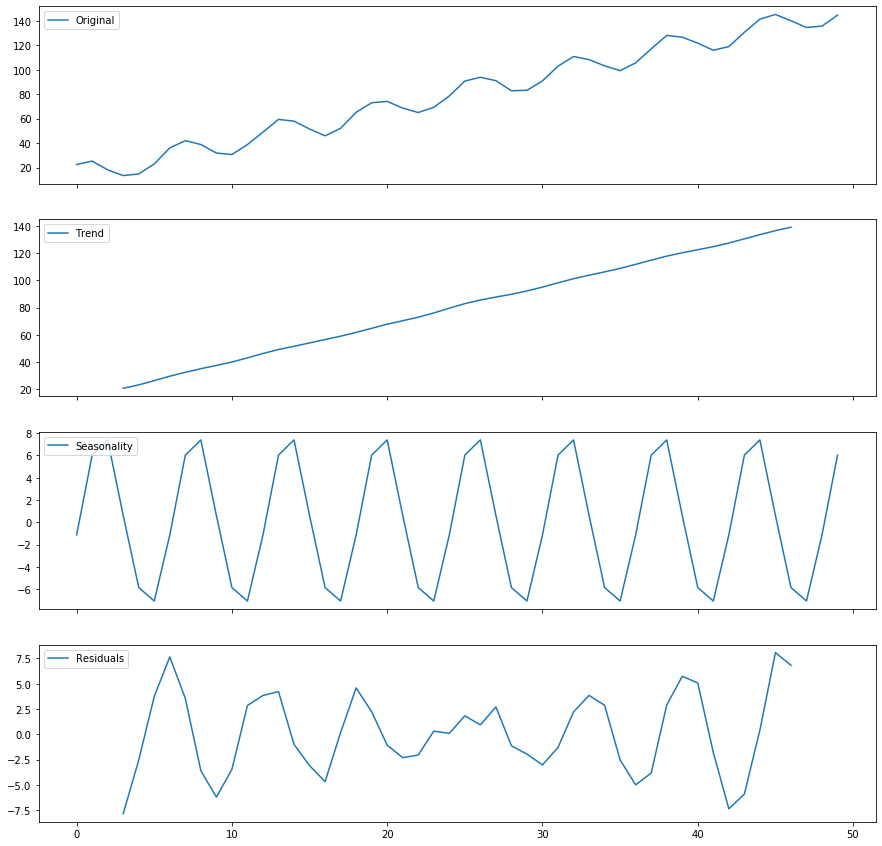

In [37]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(15)
fig.set_figwidth(15)


axes[0].plot(additive, label='Original')
axes[0].legend();

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');


axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');



axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');


The blue line in each plot representes the decomposition. There is a legend in the upper left corner of each plot to let you know what each plot represents. 

You can see the decomposition is not perfect with regards to seasonality and residuals, but it's pretty close! 

**NOTE:** You may notice both *trend* and *residuals* are missing data towards the beginning and end. This has to do with how trend is calculated (beyond the scope of this lesson). The residuals are missing simply because $R_{t} = O_{t} - T_{t} - S_{t}$, so missing trend values mean missing residual values as well. In other words, there is nothing wrong with these graphs. 

### Multiplicative Decomposition

In [38]:
ss_decomposition = seasonal_decompose(x=multiplicative, model='multiplicative', period=6)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

### Multiplicative Plots

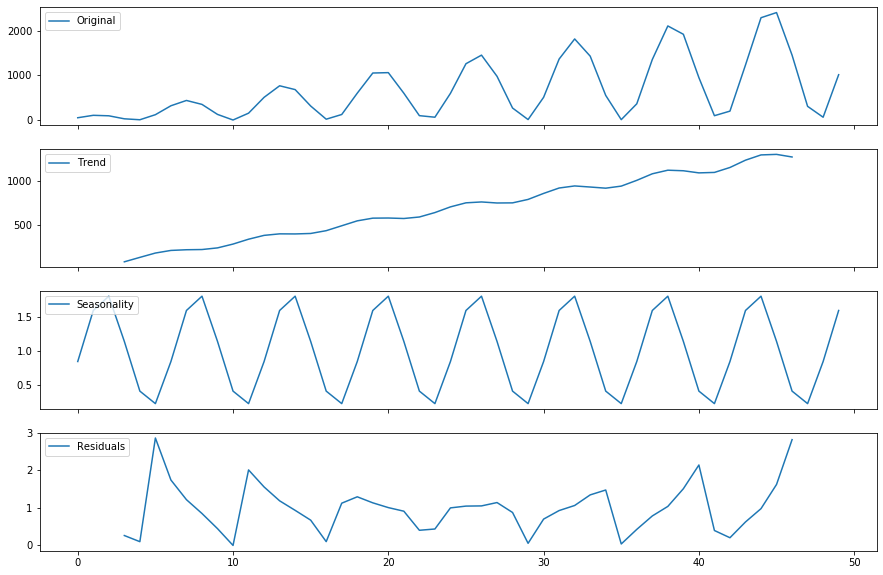

In [39]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(multiplicative, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');

Again, the decomposition does a relatively good job picking up the overall trend and seasonality. We can see the shapes follow the patterns we expect. 

### Exercise #2
In this exercise, your task is decompose **Dataset_A** and **Dataset_B**. You should first create a decomposition model in Python. Then you should plot the original series, the trend, seasonality, and residuals, in that order. 

#### Decomposition Models

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# insert code here


#### Dataset_A Plot

In [ ]:
# insert code here


#### Dataset_B Plot

In [ ]:
#insert code here


---
# Summary

In this lesson you should have gained: 
1. A practical understanding of the three components of time series data 
2. A better understanding of additive and multiplicative models
3. A simple way to decompose time series data 

Congratulations, that concludes your introduction to time series.